#### En clasificación supervisada, entrenamos un modelo para que aprenda a predecir una etiqueta (clase) a partir de un conjunto de datos donde ya conocemos las respuestas correctas.

## 1.Exploración de Datos (EDA - Exploratory Data Analysis)

#### Se carga el dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

columnas = ['sepalLengthCm','sepalWidthCm','petalLengthCm','petalWidthCm','Species']
df = pd.read_csv("../data/iris_train.csv", header=None, names=columnas)
df.head(5)

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,5.1,3.3,1.7,0.5,Iris-setosa
2,5.4,3.9,1.3,0.4,Iris-setosa
3,5.6,3.0,4.5,1.5,Iris-versicolor
4,4.8,3.0,1.4,0.1,Iris-setosa


### Estadística descriptiva

In [16]:
#Para ver estadísticas
df.describe()

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.040833,3.734167,1.188333
std,0.825232,0.441445,1.753723,0.749810
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.300000,3.300000,5.025000,1.800000
max,7.900000,4.400000,6.700000,2.500000


In [17]:
#Para ver información de los tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepalLengthCm  120 non-null    float64
 1   sepalWidthCm   120 non-null    float64
 2   petalLengthCm  120 non-null    float64
 3   petalWidthCm   120 non-null    float64
 4   Species        120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


In [15]:
#Para ver el número de muestras de cada clase
df['Species'].value_counts()

Species
Iris-versicolor    41
Iris-setosa        40
Iris-virginica     39
Name: count, dtype: int64

In [14]:
# Calcular la matriz de correlación
corr_matrix = df.corr()
# Crear un mapa de correlación
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Mapa de correlación de características')
plt.show()

ValueError: could not convert string to float: 'Iris-setosa'

# 2. Preprocesamiento de Datos

#### A. Dividir en características y etiquetas

In [16]:
X = df.drop(columns=['tipo'])  # Características
y = df['tipo']  # Etiqueta

#### B. Codificación de la etiqueta

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

#### C. Dividir en Conjuntos de Entrenamiento y Validación

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


#### D. Escalar las Características

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


# 3.Entrenamiento de un Modelo de Clasificación

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicción en el conjunto de validación
y_pred = model.predict(X_val)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_val, y_pred))


Accuracy: 1.0


# 4. Evaluación del Modelo

#### A. Matriz de Confusión

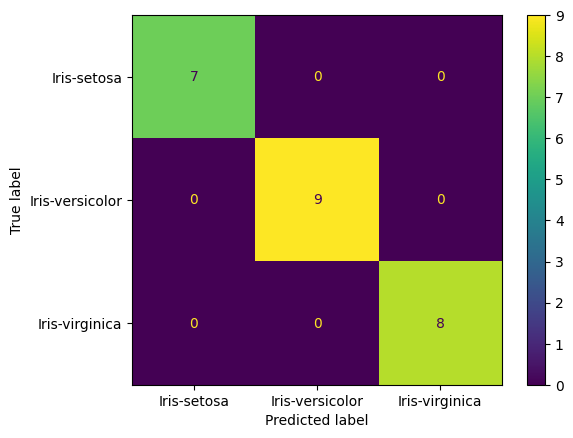

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot()
plt.show()


#### B. Métricas Avanzadas

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred, target_names=encoder.classes_))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        24
      macro avg       1.00      1.00      1.00        24
   weighted avg       1.00      1.00      1.00        24



# 5. Ajuste y Comparación de Modelos

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

# 6. Predicción en el Dataset de Test

In [39]:

# Definir los nombres de las columnas como lo hiciste para el conjunto de entrenamiento
columnas = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

# Leer el archivo de prueba
df_test = pd.read_csv("iris_test.csv", header=None, names=columnas)

print(df_test.head())


   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2      NaN
1           6.4          2.9           4.3          1.3      NaN
2           5.1          3.8           1.5          0.3      NaN
3           7.7          2.6           6.9          2.3      NaN
4           5.7          2.6           3.5          1.0      NaN


In [38]:
# Separar las características y las etiquetas
X_test = df_test.drop(columns=['species'])
y_test = df_test['species']

# Codificar las etiquetas si es necesario (usar el mismo encoder de entrenamiento)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)

# Escalar las características si ya lo hiciste con el conjunto de entrenamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)


In [31]:
X_test = scaler.transform(X_test)


c:\Users\Administrator\Desktop\IRIS\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
y_test_pred = model.predict(X_test)


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (1).

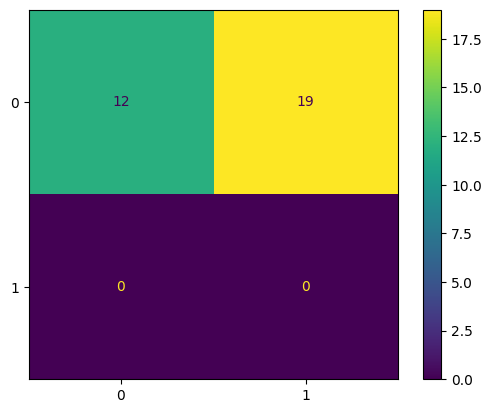

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot()
plt.show()

# Mostrar el informe de clasificación
print(classification_report(y_test, y_test_pred, target_names=encoder.classes_))
